<a href="https://colab.research.google.com/github/mdegiulio97/Parkinson-Classificator/blob/main/ParkinsonData_classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esercizio 1: Classificatore


**Introduzione**

Questo progetto utilizza un dataset relativo alla malattia di Parkinson per costruire e valutare modelli di classificazione. Viene eseguita un'analisi esplorativa dei dati (EDA) per comprendere meglio il dataset, seguita dalla preparazione dei dati, addestramento del modello e valutazione delle prestazioni.

In [ ]:
!pip install tensorflow
!pip install scikit-learn
!pip install keras-tuner
!pip install scikeras
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
!pip install --upgrade scikit-learn==1.0.2
!pip install --upgrade imbalanced-learn==0.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.6.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
# Librery
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

In [ ]:
# load the dataset
df = pd.read_csv('/content/parkinsons.data')
df = df.select_dtypes(include=[np.number])  # elimino la colonna "Name" non utile all'analisi

print("DataFrame Information:")
df.info()

print("\nDataFrame Head:")
print(df.head())

print("\nDataFrame Tail:")
print(df.tail())

print("\nDataFrame Description:")
print(df.describe())

print("\nDataFrame NULL:")
print(df.isnull().sum())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195

<ipython-input-3-4dce75271505>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues_d")


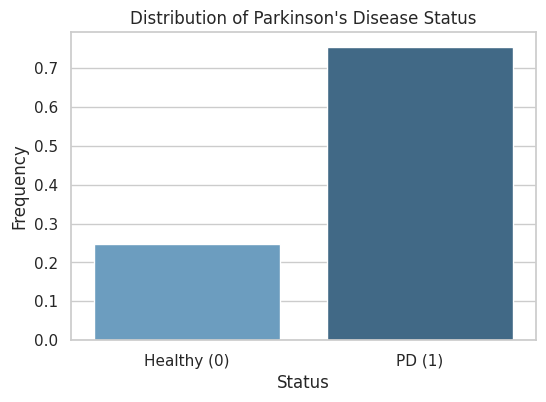

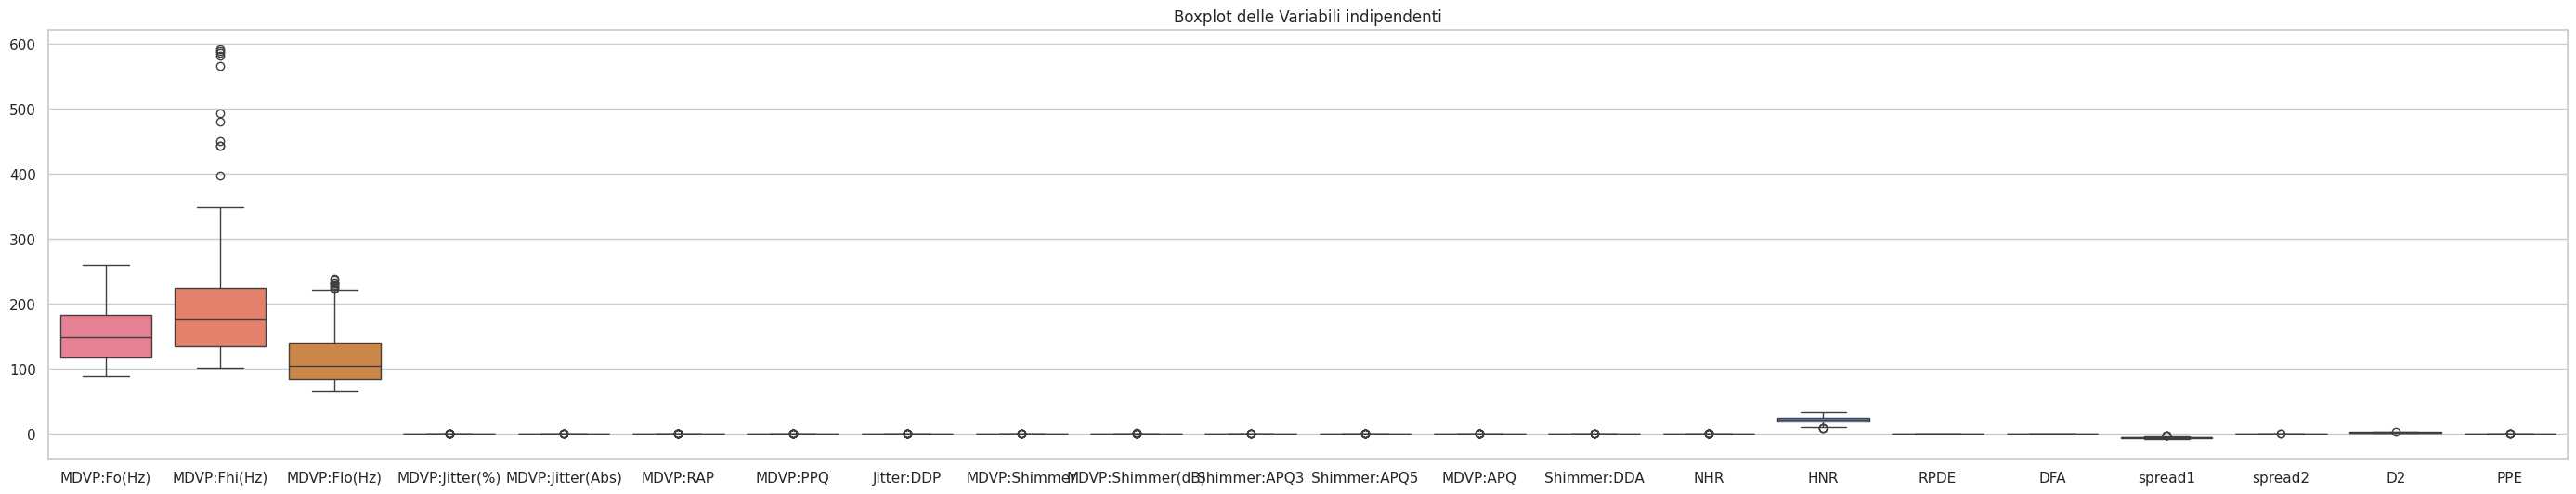

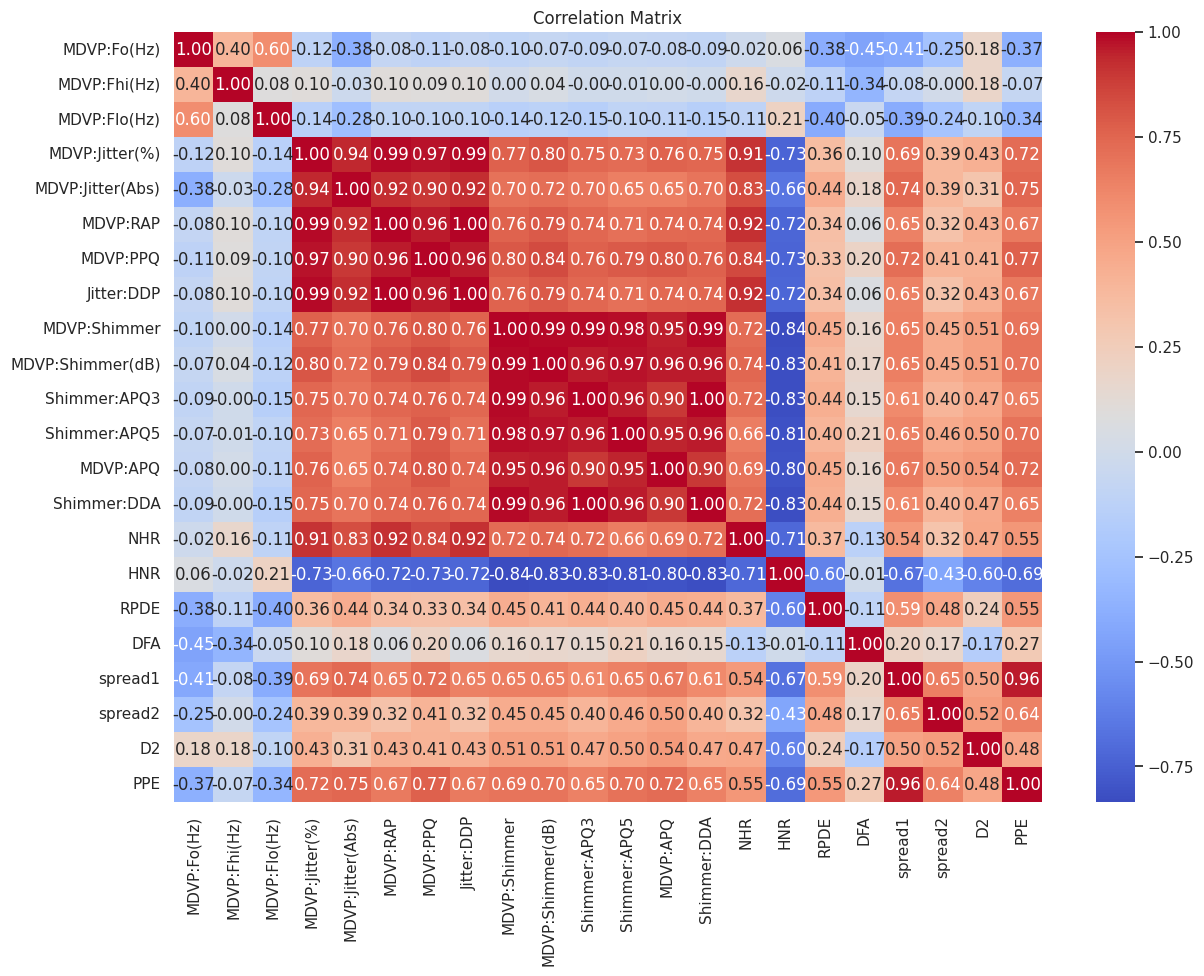

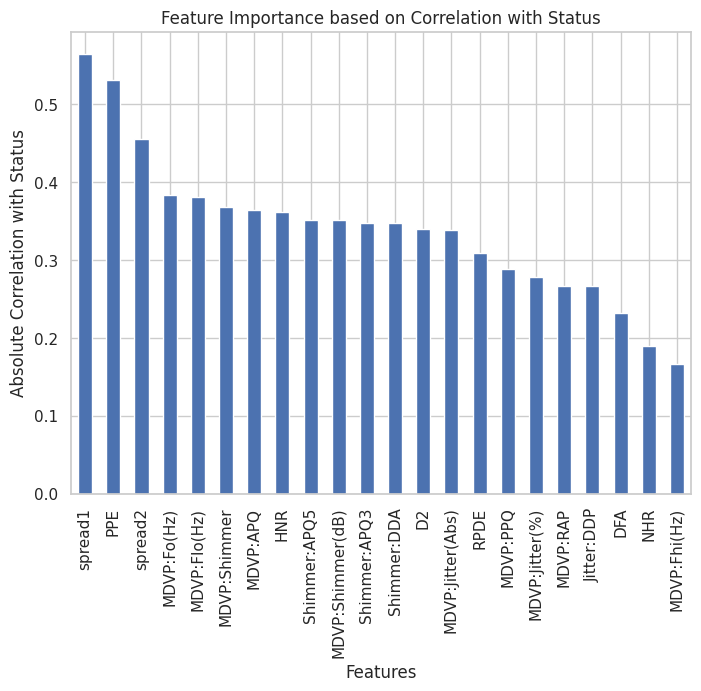

(status
 1    0.753846
 0    0.246154
 Name: proportion, dtype: float64,
 spread1             0.564838
 PPE                 0.531039
 spread2             0.454842
 MDVP:Fo(Hz)         0.383535
 MDVP:Flo(Hz)        0.380200
 MDVP:Shimmer        0.367430
 MDVP:APQ            0.364316
 HNR                 0.361515
 Shimmer:APQ5        0.351148
 MDVP:Shimmer(dB)    0.350697
 Shimmer:APQ3        0.347617
 Shimmer:DDA         0.347608
 D2                  0.340232
 MDVP:Jitter(Abs)    0.338653
 RPDE                0.308567
 MDVP:PPQ            0.288698
 MDVP:Jitter(%)      0.278220
 MDVP:RAP            0.266668
 Jitter:DDP          0.266646
 DFA                 0.231739
 NHR                 0.189429
 MDVP:Fhi(Hz)        0.166136
 dtype: float64)

In [ ]:
# EDA

sns.set(style="whitegrid")

# Checking the balance of the 'status' column to see if the dataset is balanced
status_counts = df['status'].value_counts(normalize=True)

# Plotting the distribution of the 'status' column
plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette="Blues_d")
plt.title('Distribution of Parkinson\'s Disease Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Healthy (0)', 'PD (1)'])
plt.show()

plt.figure(figsize=(35,6))
sns.boxplot(data=df.drop(['status'], axis=1))
plt.title('Boxplot delle Variabili indipendenti')
plt.show()

# Plotting the correlations among the variables
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop( 'status', axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_with_status = df.drop('status', axis=1).apply(lambda x: x.corr(df['status']))
significant_features = correlation_with_status.abs().sort_values(ascending=False)

# Plotting the most significant features based on their correlation with the 'status'
plt.figure(figsize=(8, 6))
significant_features.plot(kind='bar')
plt.title('Feature Importance based on Correlation with Status')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Status')
plt.show()

status_counts, significant_features


In [ ]:
# Assumi che X e y siano già definiti:
X = df.drop('status', axis=1)
y = df['status']

# Suddivisione dei dati in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applicare SMOTE solo sul training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribuzione delle classi prima di SMOTE:", y_train.value_counts())
print("Distribuzione delle classi dopo SMOTE:", y_train_smote.value_counts())

Distribuzione delle classi prima di SMOTE: status
1    118
0     38
Name: count, dtype: int64
Distribuzione delle classi dopo SMOTE: status
0    118
1    118
Name: count, dtype: int64


In [ ]:

# Normalizzazione dei dati
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Suddivisione dei dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:

# SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Definizione del modello con Dropout
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),  # Dropout del 50% dopo il primo strato Dense
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout del 50% dopo il secondo strato Dense
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6504 - loss: 0.6415
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7797 - loss: 0.5029
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7420 - loss: 0.4648
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7287 - loss: 0.5161
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7794 - loss: 0.4479
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8339 - loss: 0.4201
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8527 - loss: 0.3581
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8701 - loss: 0.4101
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8243 - loss: 0.3777
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8484 - loss: 0.3405
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.4059
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8429 - lo

In [ ]:

# Valutazione SVM
svm_predictions = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Valutazione Random Forest
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Valutazione Rete Neurale
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Deep Neural Network - Loss: {loss}, Accuracy: {accuracy}")


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8833 - loss: 0.2460  
Deep Neural Network - Loss: 0.2741733491420746, Accuracy: 0.8717948794364929


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

SVM ROC-AUC: 0.871031746031746
Random Forest ROC-AUC: 0.9564909297052154
Deep Network ROC-AUC: 0.9635770975056689
SVM Precision-Recall AUC: 0.9539712826184108
Random Forest Precision-Recall AUC: 0.9852707597606846
Deep Network Precision-Recall AUC: 0.9872847713169361
SVM Metrics:
Accuracy: 0.87
Precision: 0.87
Recall: 0.97
F1 Score: 0.92
Random Forest Metrics:
Accuracy: 0.89
Precision: 0.90
Recall: 0.95
F1 Score: 0.93
Deep Network Metrics:
Accuracy: 0.92
Precision: 0.93
Recall: 0.97
F1 Score: 0.95


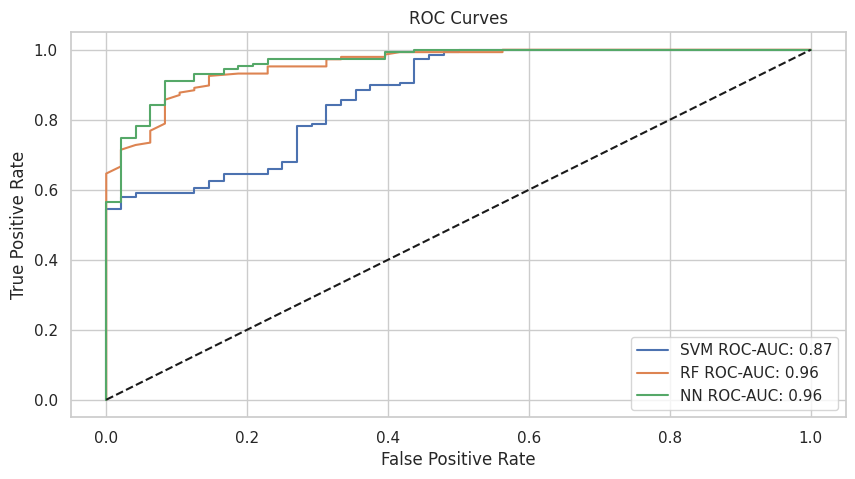

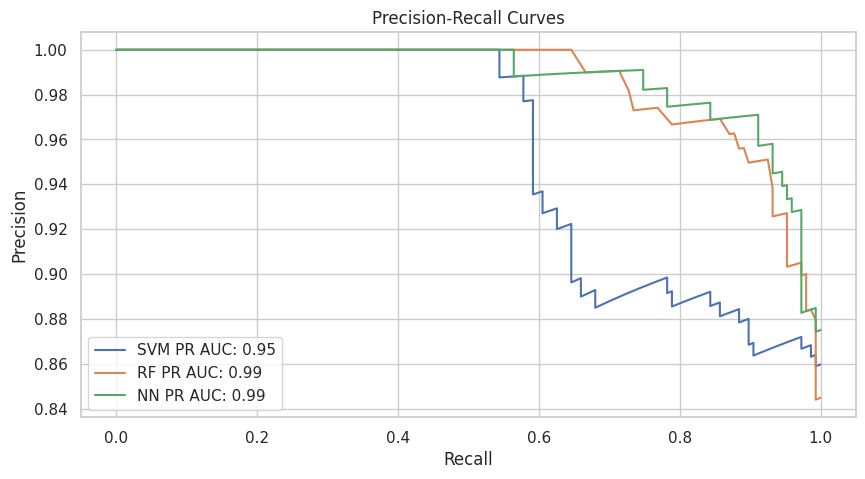

In [ ]:
# Preparazione della cross-validation stratificata
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# SVM con Cross-Validation
svm_pred_cv = cross_val_predict(svm_model, X_scaled, y, cv=cv, method='predict_proba')

# Random Forest con Cross-Validation
rf_pred_cv = cross_val_predict(rf_model, X_scaled, y, cv=cv, method='predict_proba')

# Deep Neural Network con Cross-Validation
neural_network = KerasClassifier(build_fn=model, epochs=50, batch_size=10, verbose=0)
nn_pred_cv = cross_val_predict(neural_network, X_scaled, y, cv=cv, method='predict_proba')

# Calcolo ROC-AUC per tutti i modelli
svm_roc_auc = roc_auc_score(y, svm_pred_cv[:, 1])
rf_roc_auc = roc_auc_score(y, rf_pred_cv[:, 1])
nn_roc_auc = roc_auc_score(y, nn_pred_cv[:, 1])

print(f"SVM ROC-AUC: {svm_roc_auc}")
print(f"Random Forest ROC-AUC: {rf_roc_auc}")
print(f"Deep Network ROC-AUC: {nn_roc_auc}")

# Curve di Precision-Recall per tutti i modelli
precision_svm, recall_svm, _ = precision_recall_curve(y, svm_pred_cv[:, 1])
precision_rf, recall_rf, _ = precision_recall_curve(y, rf_pred_cv[:, 1])
precision_nn, recall_nn, _ = precision_recall_curve(y, nn_pred_cv[:, 1])

# AUC per le curve di Precision-Recall
svm_pr_auc = auc(recall_svm, precision_svm)
rf_pr_auc = auc(recall_rf, precision_rf)
nn_pr_auc = auc(recall_nn, precision_nn)

print(f"SVM Precision-Recall AUC: {svm_pr_auc}")
print(f"Random Forest Precision-Recall AUC: {rf_pr_auc}")
print(f"Deep Network Precision-Recall AUC: {nn_pr_auc}")

# Convertiamo le predizioni probabilistiche in etichette binarie (0 o 1) usando una soglia di 0.5
svm_pred_labels = (svm_pred_cv[:, 1] >= 0.5).astype(int)
rf_pred_labels = (rf_pred_cv[:, 1] >= 0.5).astype(int)
nn_pred_labels = (nn_pred_cv[:, 1] >= 0.5).astype(int)

# Funzione per calcolare e stampare le metriche
def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

print_metrics(y, svm_pred_labels, "SVM")
print_metrics(y, rf_pred_labels, "Random Forest")
print_metrics(y, nn_pred_labels, "Deep Network")

# Plottare ROC Curve per tutti i modelli
plt.figure(figsize=(10, 5))
plt.plot(*roc_curve(y, svm_pred_cv[:, 1])[:2], label=f'SVM ROC-AUC: {svm_roc_auc:.2f}')
plt.plot(*roc_curve(y, rf_pred_cv[:, 1])[:2], label=f'RF ROC-AUC: {rf_roc_auc:.2f}')
plt.plot(*roc_curve(y, nn_pred_cv[:, 1])[:2], label=f'NN ROC-AUC: {nn_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()

# Plottare Precision-Recall Curve per tutti i modelli
plt.figure(figsize=(10, 5))
plt.plot(recall_svm, precision_svm, label=f'SVM PR AUC: {svm_pr_auc:.2f}')
plt.plot(recall_rf, precision_rf, label=f'RF PR AUC: {rf_pr_auc:.2f}')
plt.plot(recall_nn, precision_nn, label=f'NN PR AUC: {nn_pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='best')
plt.show()
